In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

dataset = 'dataset.csv'
df = pd.read_csv(dataset)

df.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [2]:
df.shape

(365, 2)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [4]:
df.Data = pd.to_datetime(df.Data, format = '%Y-%m-%d')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [5]:
df.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


# Criando df2 para fazer agrupamento por mês

Mes
1     1560.587027
2     1442.256437
3     1661.761162
4     1645.893941
5     1768.165178
6     1777.855749
7     1869.042792
8     1908.261083
9     1855.021848
10    2024.041978
11    2012.635660
12    2065.129330
Name: Total_Vendas, dtype: float64


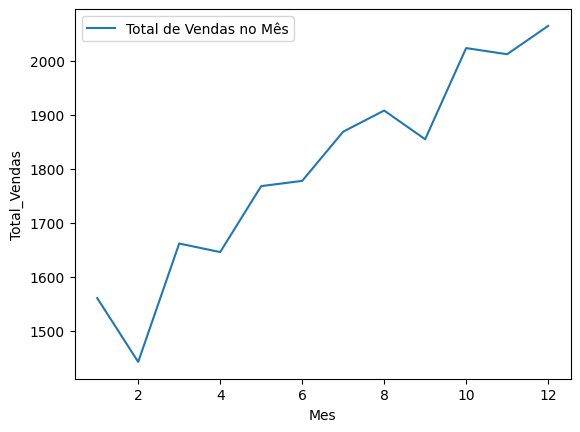

In [6]:
df2 = df

df2['Mes'] = df['Data'].dt.month

df2_sum = df2[['Mes', 'Total_Vendas']].groupby('Mes')['Total_Vendas'].sum()

print(df2_sum.head(12))

sns.lineplot(data = df2_sum, label = 'Total de Vendas no Mês')
plt.legend()
plt.show()

# Voltando para a aula

In [7]:
df = df.drop(columns = ['Mes'])

df.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [10]:
# alterando o índice e colocando a data como index.
serie_temporal = df.set_index('Data')['Total_Vendas']

serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

In [9]:
serie_temporal = serie_temporal.asfreq('D')

serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

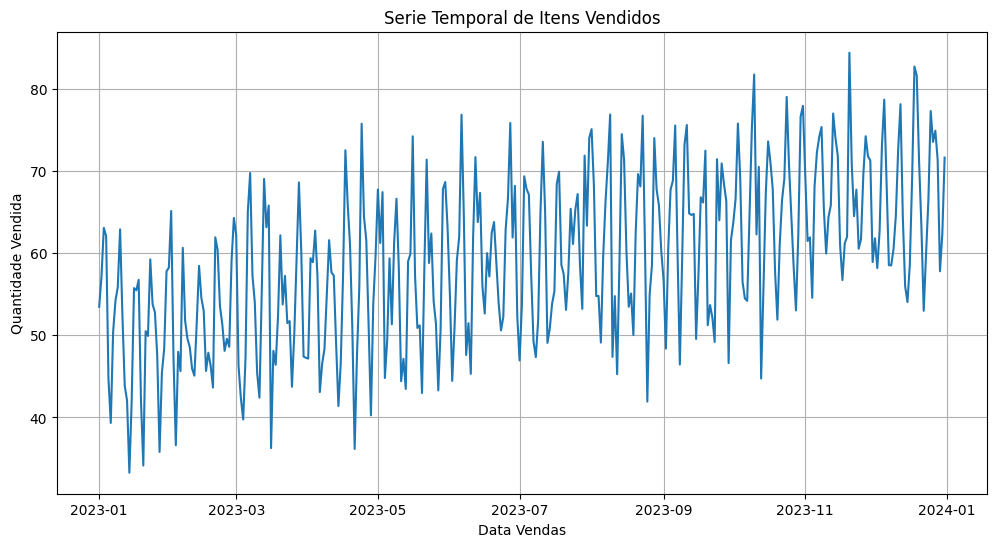

In [13]:
plt.figure(figsize = (12, 6))
plt.plot(serie_temporal)
plt.xlabel('Data Vendas')
plt.ylabel('Quantidade Vendida')
plt.title('Serie Temporal de Itens Vendidos')
plt.grid(True)
plt.show()

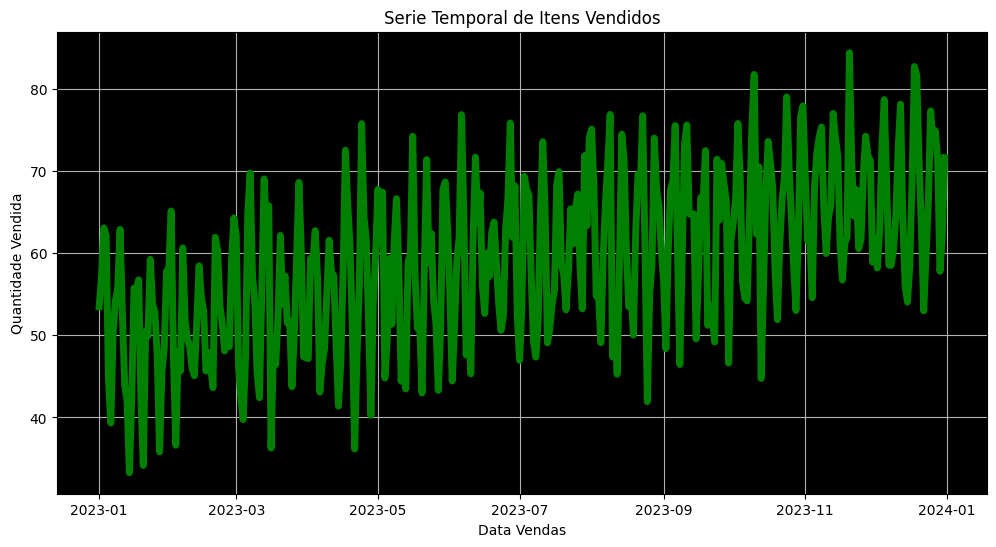

In [19]:
plt.figure(figsize = (12, 6))
plt.plot(serie_temporal, color = 'g', linewidth = 5)
plt.gca().set_facecolor('k')
plt.xlabel('Data Vendas')
plt.ylabel('Quantidade Vendida')
plt.title('Serie Temporal de Itens Vendidos')
plt.grid(True)
plt.show()

In [20]:
#criando, ajustando e suavizando o modelo

modelo = SimpleExpSmoothing(serie_temporal)

modelo_ajustado = modelo.fit(smoothing_level = 0.2)

suavizacao_exponencial = modelo_ajustado.fittedvalues

C:\Users\gusta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


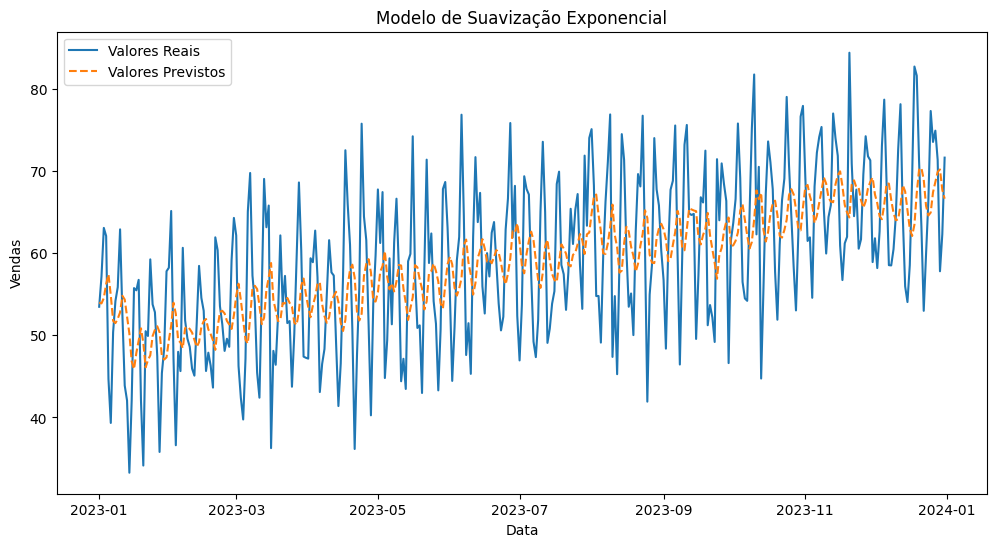

In [21]:
#criando gráfico

plt.figure(figsize = (12, 6))
plt.plot(serie_temporal, label = 'Valores Reais')
plt.plot(suavizacao_exponencial, label = 'Valores Previstos', linestyle = '--')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Modelo de Suavização Exponencial')
plt.legend()
plt.show()

In [39]:
#previsoe1
numero_previsoes = 1
previsoes = modelo_ajustado.forecast(steps = numero_previsoes)
previsoes

2024-01-01    67.649892
Freq: D, dtype: float64